## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Homework5_Mouse_metadata.csv"
study_results_path = "data/Homework5_Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
combined_df["Mouse ID"].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_combined_dp = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
mouse_combined_dp["Mouse ID"]

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_df.loc[combined_df["Mouse ID"] == "g989"]
duplicate_mouse.head(20)

# Select all duplicate rows based on multiple column names in list


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_df2=combined_df.set_index('Mouse ID')
combined_df2
data_clean=combined_df2.drop(index='g989')


# Delete these row indexes from dataFrame


In [6]:
# Checking the number of mice in the clean DataFrame.
len(data_clean)

1880

In [7]:
data_clean=data_clean.reset_index()

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
data_clean.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})





Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function.

# This method is the most straightforward, creating multiple series and putting them all together at the end.
drugs_group=data_clean.groupby("Drug Regimen")
drugs_variance=drugs_group["Tumor Volume (mm3)"].var()
drugs_mean=drugs_group["Tumor Volume (mm3)"].mean()
drugs_median=drugs_group["Tumor Volume (mm3)"].median()
drugs_sem=drugs_group["Tumor Volume (mm3)"].std()
drugs_std=drugs_group["Tumor Volume (mm3)"].sem()
#Present Data in Dataframe
summarydrug_df= pd.DataFrame({"Regimen Mean": drugs_mean,
                                    "Regimen Median": drugs_median,
                                "Regimen Variance": drugs_variance,
                                "Regimen Standard Dev": drugs_std,
                             "Regimen SEM": drugs_sem})
summarydrug_df


,Regimen Mean,Regimen Median,Regimen Variance,Regimen Standard Dev,Regimen SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,0.329346,4.994774
Ceftamin,52.591172,51.776157,39.290177,0.469821,6.268188
Infubinol,52.884795,51.820584,43.128684,0.492236,6.567243
Ketapril,55.235638,53.698743,68.553577,0.603860,8.279709
Naftisol,54.331565,52.509285,66.173479,0.596466,8.134708
Placebo,54.033581,52.288934,61.168083,0.581331,7.821003
Propriva,52.320930,50.446266,43.852013,0.544332,6.622085
Ramicane,40.216745,40.673236,23.486704,0.320955,4.846308
Stelasyn,54.233149,52.431737,59.450562,0.573111,7.710419


In [10]:
data_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Bar Plots

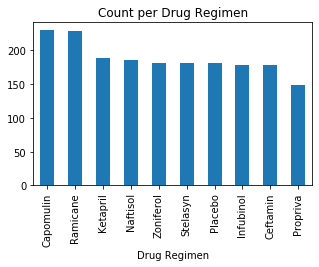

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

mouse_per_treatment = data_clean.groupby("Drug Regimen")["Timepoint"].count().sort_values(ascending = False)

mouse_per_treatment.plot(kind="bar", figsize=(5,3))

# Set a title for the chart
plt.title("Count per Drug Regimen")

plt.show()
plt.tight_layout()


<BarContainer object of 10 artists>

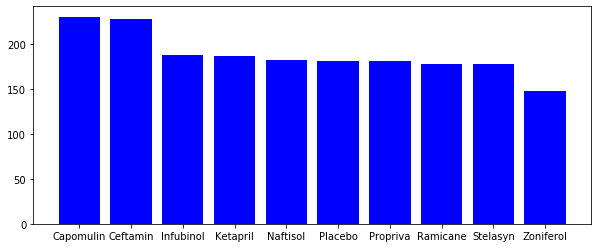

In [14]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
drug_regimens = summarydrug_df.index.tolist()

x_axis = np.arange(len(drug_regimens))

# Define x-axis
x_axis = drug_regimens
# Create a bar chart based upon the above data
plt.figure(figsize=(10,4))
plt.bar(drug_regimens, mouse_per_treatment, color='b', alpha=1, align="center")


In [ ]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(0, len(gyms))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

plt.title("NYC Gym Popularity")
plt.xlabel("Gym Name")
plt.ylabel("Number of Members")

plt.xlim(-0.75, len(gyms)-.25)
plt.ylim(0, max(members) + 5)

plt.bar(x_axis, members, facecolor="red", alpha=0.75, align="center")
plt.xticks(tick_locations, gyms)
plt.show()

## Pie Plots

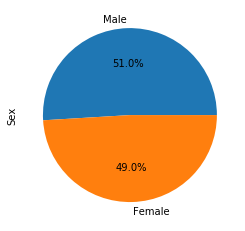

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group=data_clean["Sex"].value_counts()
gender_group

gender_group.plot(kind="pie", autopct="%1.1f%%")
plt.show()


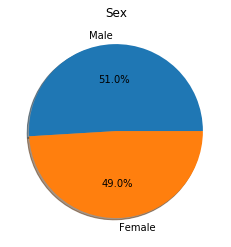

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.title("Sex")
plt.pie(gender_group.values, labels=gender_group.index,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.show()

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
df_max=data_clean.groupby(['Drug Regimen',"Mouse ID"],as_index=False)['Timepoint'].max()

df_max.head()

,Drug Regimen,Mouse ID,Timepoint
0,Capomulin,b128,45
1,Capomulin,b742,45
2,Capomulin,f966,20
3,Capomulin,g288,45
4,Capomulin,g316,45


In [32]:
quartile_df= pd.merge(df_max, data_clean, on=("Mouse ID","Timepoint"))
quartile_df.head()

,Drug Regimen_x,Mouse ID,Timepoint,Drug Regimen_y,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,Capomulin,b128,45,Capomulin,Female,9,22,38.982878,2
1,Capomulin,b742,45,Capomulin,Male,7,21,38.939633,0
2,Capomulin,f966,20,Capomulin,Male,16,17,30.485985,0
3,Capomulin,g288,45,Capomulin,Male,3,19,37.074024,1
4,Capomulin,g316,45,Capomulin,Female,22,22,40.159220,2


In [83]:
# Quantitatively determine capomulin outliers
cap_df=quartile_df.loc[quartile_df["Drug Regimen_x"] == "Capomulin", :]
cap_quartiles = cap_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = cap_quartiles[0.25]
upperq = cap_quartiles[0.75]
iqr = upperq-lowerq


lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers_cap=cap_df[(cap_df['Tumor Volume (mm3)'] > upper_bound) | (cap_df['Tumor Volume (mm3)'] < lower_bound) ]
print(f"Capomulin potential outliers:")
outliers_cap

Capomulin potential outliers:


,Drug Regimen_x,Mouse ID,Timepoint,Drug Regimen_y,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites


In [82]:
# Quantitatively determine ramicane outliers
ram_df=quartile_df.loc[quartile_df["Drug Regimen_x"] == "Ramicane", :]
ram_quartiles = ram_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = ram_quartiles[0.25]
upperq = ram_quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)


outliers_ram=ram_df[(ram_df['Tumor Volume (mm3)'] > upper_bound) |  (ram_df['Tumor Volume (mm3)'] < lower_bound) ]
print(f"Ramicane potential outliers:")
outliers_ram

Ramicane potential outliers:


,Drug Regimen_x,Mouse ID,Timepoint,Drug Regimen_y,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites


In [79]:
# Quantitatively determine infubinol outliers
inf_df=quartile_df.loc[quartile_df["Drug Regimen_x"] == "Infubinol", :]
inf_quartiles = inf_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = inf_quartiles[0.25]
upperq = inf_quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

outliers_inf=inf_df[(inf_df['Tumor Volume (mm3)'] > upper_bound) |  (inf_df['Tumor Volume (mm3)'] < lower_bound) ]
print(f"Infubinol potential outliers:")
(outliers_inf)

Infubinol potential outliers:


,Drug Regimen_x,Mouse ID,Timepoint,Drug Regimen_y,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
55,Infubinol,c326,5,Infubinol,Female,18,25,36.321346,0


In [86]:
# Quantitatively determine ceftamin outliers
ceft_df=quartile_df.loc[quartile_df["Drug Regimen_x"] == "Ceftamin", :]
ceft_quartiles = ceft_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = ceft_quartiles[0.25]
upperq = ceft_quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers_ceft=ceft_df[(ceft_df['Tumor Volume (mm3)'] > upper_bound) |  (ceft_df['Tumor Volume (mm3)'] < lower_bound) ]
print(f"Ceftamin potential outliers:")
(outliers_ceft)


Ceftamin potential outliers:


,Drug Regimen_x,Mouse ID,Timepoint,Drug Regimen_y,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites


In [96]:
ceft_df.head()

,Drug Regimen_x,Mouse ID,Timepoint,Drug Regimen_y,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
25,Ceftamin,a275,45,Ceftamin,Female,20,28,62.999356,3
26,Ceftamin,b447,0,Ceftamin,Male,2,30,45.000000,0
27,Ceftamin,b487,25,Ceftamin,Female,6,28,56.057749,1
28,Ceftamin,b759,30,Ceftamin,Female,12,25,55.742829,1
29,Ceftamin,f436,15,Ceftamin,Female,3,25,48.722078,2


In [115]:
data_to_plot=[ceft_df['Tumor Volume (mm3)'], inf_df["Tumor Volume (mm3)"], ram_df["Tumor Volume (mm3)"],cap_df['Tumor Volume (mm3)']]
labels_drugs= ["Ceftamin","Infubinol","Ramicane","Capomulin"]

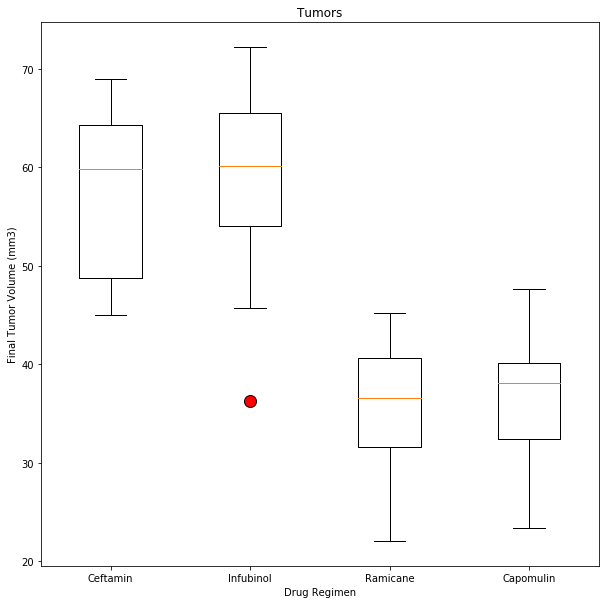

In [121]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


fig1, ax1 = plt.subplots(1, 1, figsize=(10,10))
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
flierprops= dict(marker='o', markerfacecolor='r', markersize=12)
ax1.boxplot(data_to_plot, labels=labels_drugs, flierprops=flierprops)

plt.show()


## Line and Scatter Plots

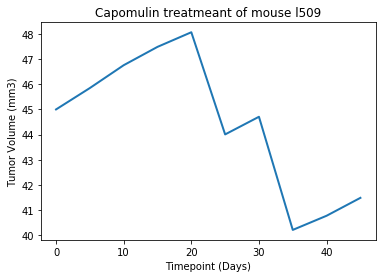

In [37]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


line_df = data_clean.loc[data_clean["Mouse ID"] == "l509",:]
x_axis_line = line_df["Timepoint"]
tumor_size = line_df["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis_line, tumor_size,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

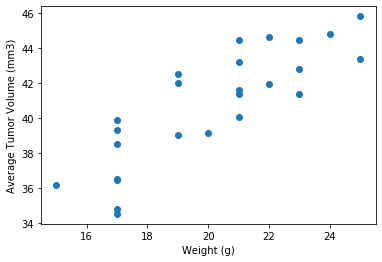

In [43]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin  = data_clean.set_index('Drug Regimen')

capomulin= capomulin.filter(like="Capomulin", axis=0)
capavg = capomulin.groupby(['Mouse ID']).mean()
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


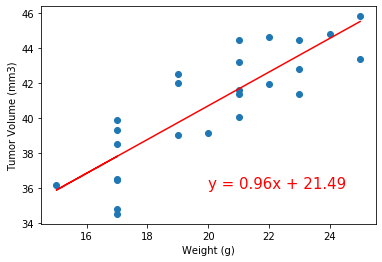

In [45]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Calculate the correlation coefficient and linear regression model 
corr=round(st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin['Weight (g)']
y_values = capomulin['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

